In [37]:
from math import *
from random import *
import matplotlib
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc

def line(dst, src, c="black",width=2):
    plt.annotate('', xy=dst, xytext=src, xycoords='data', 
                 textcoords='data', arrowprops=dict(arrowstyle="-",linewidth=width*1.5,color="black"))
    plt.annotate('', xy=dst, xytext=src, xycoords='data', 
                 textcoords='data', arrowprops=dict(arrowstyle="-",linewidth=width,color=c))
    dst=np.array(dst).astype(np.float64)
    src=np.array(src).astype(np.float64)
    
    return sqrt((dst[0]-src[0])**2 + (dst[1]-src[1])**2)

def square(ll, side, c="black",width=2):
   line(ll, (ll[0]-side, ll[1]), c=c,width=width)    
   line(ll, (ll[0], ll[1]-+side), c=c,width=width)    
   line((ll[0]-side, ll[1]-side), (ll[0], ll[1]-side), c=c,width=width)    
   line((ll[0]-side, ll[1]-side), (ll[0]-side, ll[1]), c=c,width=width)
   return side**2

def square2(center, side, c="black", width=2):
   line((center[0]-side, center[1]-side),
        (center[0]-side, center[1]+side), c=c, width=width)
   line((center[0]-side, center[1]+side),
        (center[0]+side, center[1]+side), c=c, width=width)
   line((center[0]+side, center[1]+side),
        (center[0]+side, center[1]-side), c=c, width=width)
   line((center[0]+side, center[1]-side),
        (center[0]-side, center[1]-side), c=c, width=width)
   return side**2

def circ(center, radius, color="black", width=2):
   circ = plt.Circle(center, radius=radius, color=color, fill=False, linewidth=width)
   ax.add_patch(circ)
   return pi*radius**2

def arc(center, radius, base=-90, theta=0, color="black", width=4):
   arc = Arc(center, radius, radius, theta1=base, theta2=base+theta, linewidth=width, color=color)
   ax.add_patch(arc)
    
def annotate(text, center, offset=(-20,-30), width=0.5, color="black", arrow=True):
    if arrow==True: plt.annotate(text, xy=center, xytext=offset, xycoords='data', fontsize=12,
                 textcoords='offset points', arrowprops=dict(arrowstyle="fancy",linewidth=width,color=color))
    plt.plot(center[0], center[1],marker="o",c=color)
    
    
    
def degreesToRadians(t): return t*(180/pi)



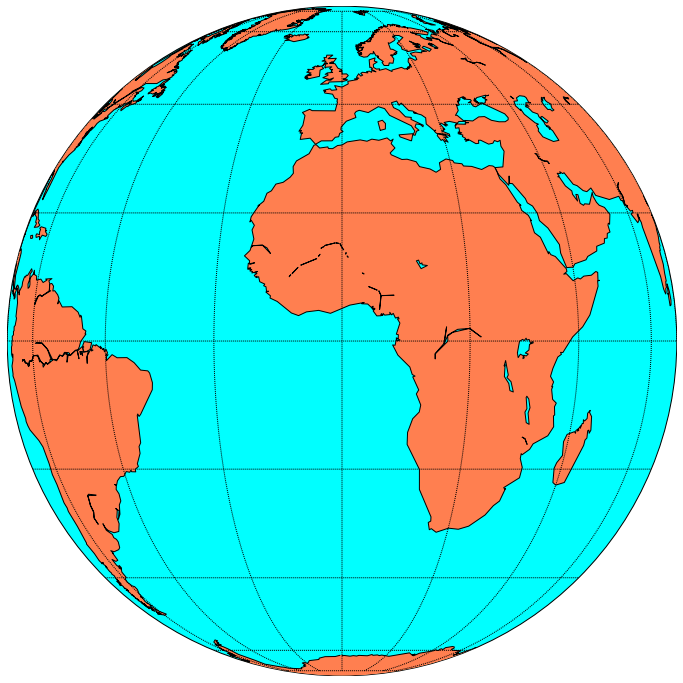

Orthostatic Projection of Earth, quantized into 16ths as per BBP formulation of pi
16 * pi/8 == 2*pi == 1 unit circle


In [38]:
f, ax = plt.subplots(figsize=(12,12))

def makeMap():
    m = Basemap(projection='ortho',
                  lat_0=0, lon_0=0)

    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='coral',lake_color='aqua')
    m.drawcoastlines()
    parallels = np.arange(-90,90,degreesToRadians(pi/8)) #pi/8 == 22.5 degrees
    m.drawparallels(parallels)
    meridians = np.arange(0.,360.,degreesToRadians(pi/8))#pi/8 == 22.5 degrees
    m.drawmeridians(meridians)
    return m

m = makeMap()
plt.show()

print "Orthostatic Projection of Earth, quantized into 16ths as per BBP formulation of pi"
print "16 * pi/8 == 2*pi == 1 unit circle"


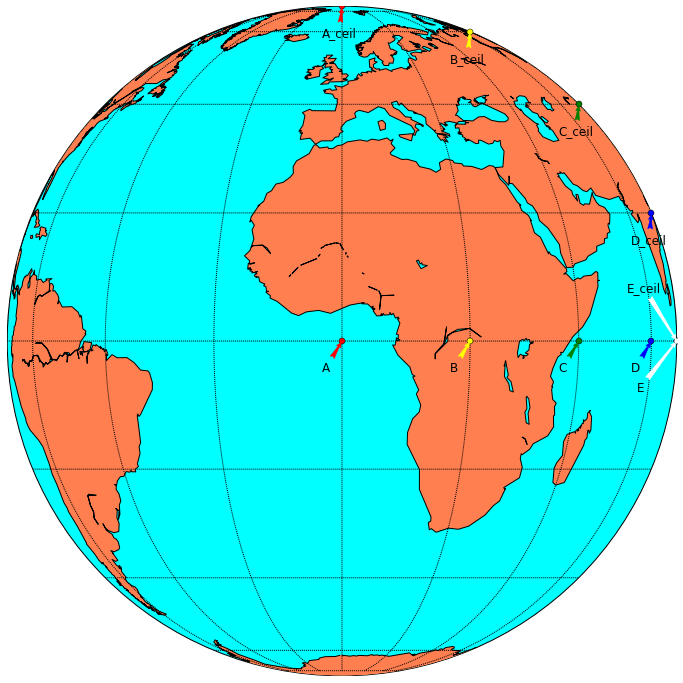

In [39]:
plt.figure(figsize=(12,12))
#f, ax = plt.subplots()
m = makeMap()

A=m(0,0)     #0*pi/8
B=m(22.5,0)  #1*pi/8
C=m(45,0)    #2*pi/8
D=m(67.5,0)  #3*pi/8
E=m(90,0)    #4*pi/8

A_ceil=(A[0], A[1]+A[1]*cos(0*pi/8)) #0 degrees
B_ceil=(B[0], A[1]+A[1]*cos(1*pi/8)) #22.5 degrees
C_ceil=(C[0], A[1]+A[1]*cos(2*pi/8)) #45 degrees
D_ceil=(D[0], A[1]+A[1]*cos(3*pi/8)) #67.5 degrees
E_ceil=(E[0], A[1]+A[1]*cos(4*pi/8)) #90 degrees

def do_annotate(arrow=True):

    annotate('A', A, color="red", arrow=arrow)
    annotate('B', B, color="yellow", arrow=arrow)
    annotate('C', C, color="green", arrow=arrow)
    annotate('D', D, color="blue", arrow=arrow)
    annotate('E', E, color="white", offset=(-40,-50), arrow=arrow)

    annotate('A_ceil', A_ceil, color="red", arrow=arrow)
    annotate('B_ceil', B_ceil, color="yellow", arrow=arrow)
    annotate('C_ceil', C_ceil, color="green", arrow=arrow)
    annotate('D_ceil', D_ceil, color="blue", arrow=arrow)
    annotate('E_ceil', E_ceil, color="white", offset=(-50,50), arrow=arrow)


do_annotate()

A_Vert (absolute length of red segments): 6369885.05126
B_Vert (absolute length of yellow segments): 5884921.78125
C_Vert (absolute length of green segments): 4503863.23288
D_Vert (absolute length of blue segments): 2436963.05081
Relative ratios:  1.0 0.923866244664 0.707055652753 0.382575671491
Cosine values of n*pi/8 (22.5 degrees), n==0:4:  1.0 0.923879532511 0.923879532511 0.707106781187 0.382683432365


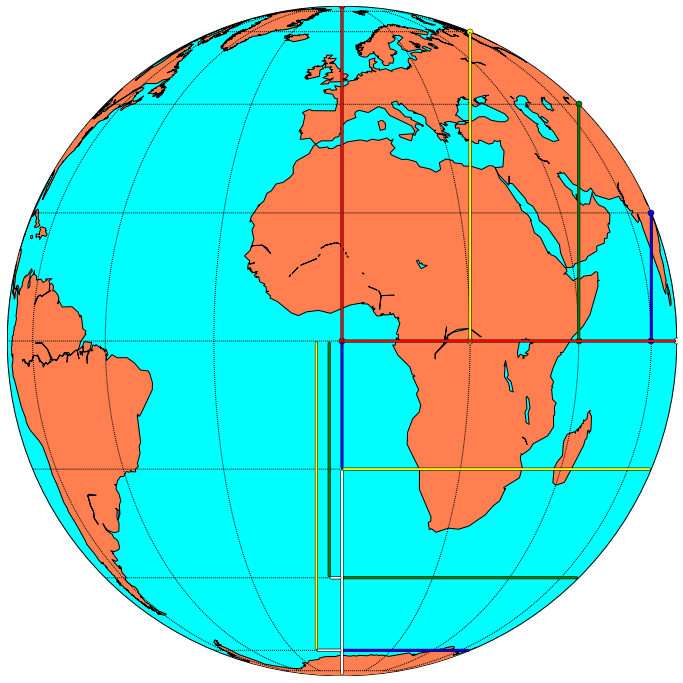

In [40]:
plt.figure(figsize=(12,12))
#f, ax = plt.subplots()
m = makeMap()



A_vert = A_ceil[1]-A[1]
B_vert = B_ceil[1]-B[1]
C_vert = C_ceil[1]-C[1]
D_vert = D_ceil[1]-D[1]
E_vert = E_ceil[1]-E[1]

def do_lines(toponly=False):
    line(A, A_ceil, c="red",width=2)
    line(B, B_ceil, c="yellow",width=2)
    line(C, C_ceil, c="green",width=2)
    line(D, D_ceil, c="blue",width=2)
    if toponly: return

    line(A,E,c="red")

    line((A[0]-0, A[1]), (A[0], A[1]-D_vert), c="blue")
    line((A[0]-0, A[1]-D_vert), (A[0]+B_vert, A[1]-D_vert), c="yellow")

    line((A[0]-D_vert/10, A[1]), (A[0]-D_vert/10, A[1]-C_vert), c="green")
    line((A[0]-D_vert/10, A[1]-C_vert), (A[0]+C_vert, A[1]-C_vert), c="green")

    line((A[0]-D_vert/10*2, A[1]), (A[0]-D_vert/10*2, A[1]-B_vert), c="yellow")
    line((A[0]-D_vert/10*2, A[1]-B_vert), (A[0]+D_vert, A[1]-B_vert), c="blue")

    line((A[0], A[1]-D_vert), (A[0], A[1]-A_vert), c="white")
    line((A[0], A[1]-C_vert), (A[0]-D_vert/10, A[1]-C_vert), c="white")


    line((A[0], A[1]-B_vert), (A[0]-D_vert/10*2, A[1]-B_vert), c="white")

do_lines()

do_annotate(arrow=False)

print "A_Vert (absolute length of red segments):", A_vert
print "B_Vert (absolute length of yellow segments):", B_vert
print "C_Vert (absolute length of green segments):", C_vert
print "D_Vert (absolute length of blue segments):", D_vert

print "Relative ratios: ", A_vert/float(A_vert), B_vert/float(A_vert), C_vert/float(A_vert), D_vert/float(A_vert)
print "Cosine values of n*pi/8 (22.5 degrees), n=[0:4]: ", cos(0*pi/8), cos(1*pi/8), cos(1*pi/8), cos(2*pi/8), cos(3*pi/8)

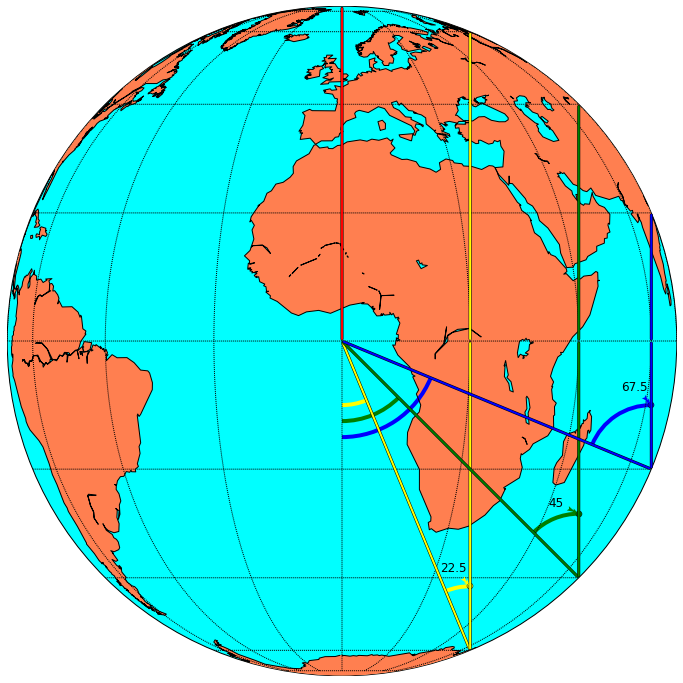

In [41]:
f, ax = plt.subplots(figsize=(12,12))
m = makeMap()

do_lines(toponly=True)

def do_angles():
    # Angles, difference between which is 22.5 degrees or pi/8
    line(A, (B[0], B[1]-B_vert), c="yellow")
    line(B, (B[0], B[1]-B_vert), c="yellow")
    line(A, (C[0], C[1]-C_vert), c="green")
    line(C, (C[0], C[1]-C_vert), c="green")
    line(A, (D[0], D[1]-D_vert), c="blue")
    line(D, (D[0], D[1]-D_vert), c="blue")

do_angles()
def do_arc():

    arc(A,D_vert,theta=22.5, color="yellow")
    arc((B[0],B[1]-B_vert),-D_vert,theta=22.5, color="yellow")
    arc(A,D_vert*1.25,theta=45, color="green")
    arc((C[0],B[1]-C_vert),-D_vert,theta=45, color="green")
    arc(A,D_vert*1.5,theta=67.5, color="blue")
    arc((D[0],B[1]-D_vert),-D_vert,theta=67.5, color="blue")

    
do_arc()

annotate('22.5', (B[0],B[1]-B_vert+D_vert/2), offset=(-30,15), color="yellow", arrow=True, width=0)
annotate('45',   (C[0],C[1]-C_vert+D_vert/2), offset=(-30,7.5), color="green", arrow=True, width=0)
annotate('67.5', (D[0],D[1]-D_vert+D_vert/2), offset=(-30,15), color="blue", arrow=True, width=0)


Relative ratio between square areas, red::yellow::green::blue:
1.0
0.85352883803
0.49992769609
0.146364144417
Maximum predicted violations of Bell Inequalities as per Tsirelson's Bound, cos(n*pi/8)**2, n=[0:4]:
1.0
0.853553390593
0.5
0.146446609407


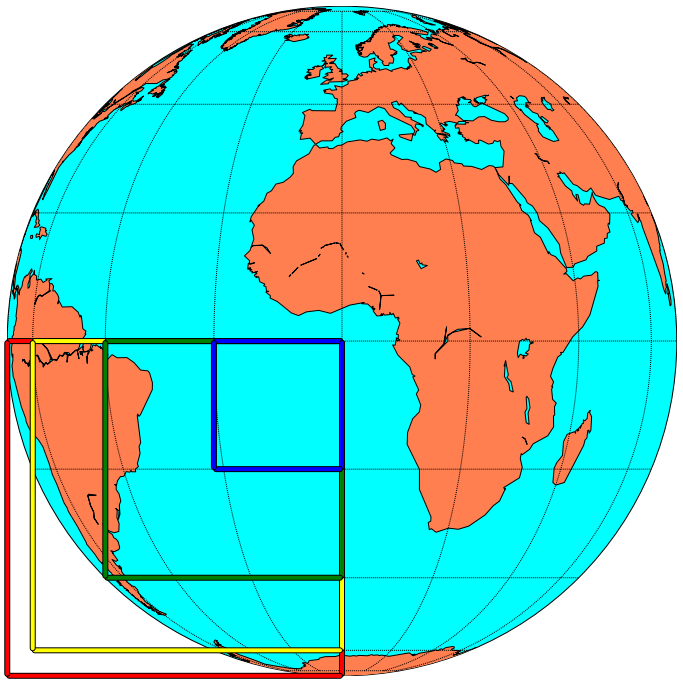

In [46]:
plt.figure(figsize=(12,12))
#f, ax = plt.subplots()
m = makeMap()

def do_squares():
    # Area Squares, difference between which is 100:85:50:14 (cos2)
    areas=[]
    areas.append(square(A, A_vert, c="red", width=4))
    areas.append(square(A, B_vert, c="yellow",width=4))
    areas.append(square(A, C_vert, c="green",width=4))
    areas.append(square(A, D_vert, c="blue",width=4))
    return areas
areas=do_squares()
print "Relative ratio between square areas, red::yellow::green::blue:"
for i in range(0,4):
    print areas[i]/areas[0]
print "Maximum predicted violations of Bell Inequalities as per Tsirelson's Bound, cos(n*pi/8)**2, n=[0:4]:"
for i in range(0,4):
    print cos(i*pi/8)**2


Relative ratio between square areas, red::yellow::green::blue:
1.0
0.85352883803
0.49992769609
0.146364144417


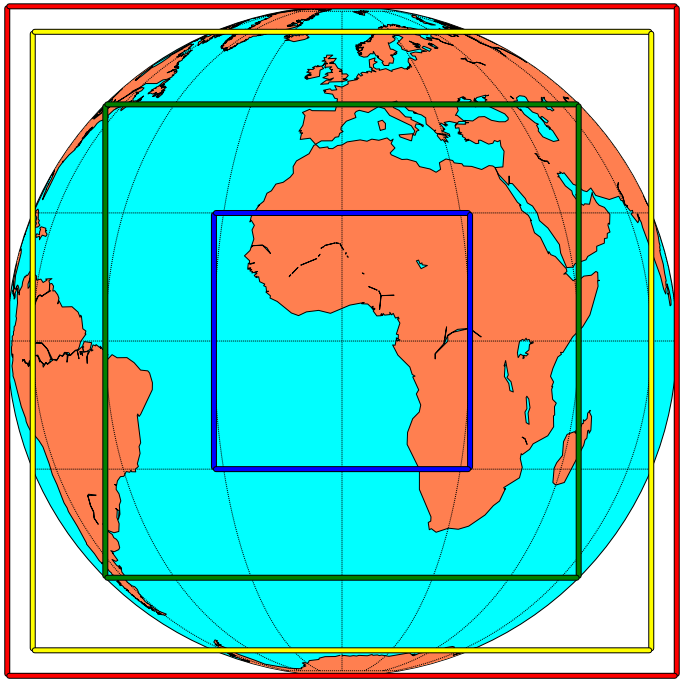

In [43]:
plt.figure(figsize=(12,12))
#f, ax = plt.subplots()
m = makeMap()

def do_squares2():
    areas=[]
    areas.append(square2(A, A_vert, c="red", width=4))
    areas.append(square2(A, B_vert, c="yellow", width=4))
    areas.append(square2(A, C_vert, c="green", width=4))
    areas.append(square2(A, D_vert, c="blue", width=4))
    return areas
areas = do_squares2()
print "Relative ratio between square areas, red::yellow::green::blue:"
for i in range(0,4):
    print areas[i]/areas[0]

Relative ratio between circular areas, red::yellow::green::blue:
1.0
0.85352883803
0.49992769609
0.146364144417


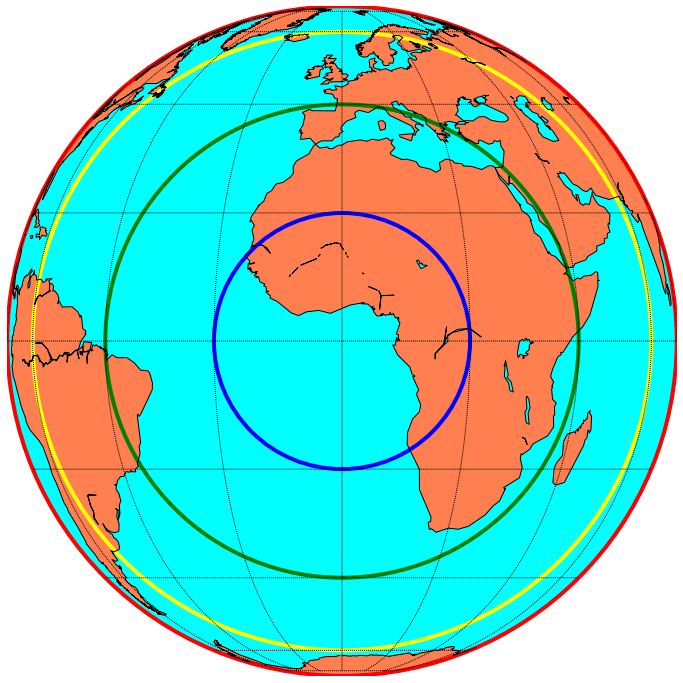

In [44]:
f, ax = plt.subplots(figsize=(12,12))
m = makeMap()

def do_circ():
    areas = []
    areas.append(circ(A,A_vert,color="red",width=4))
    areas.append(circ(A,B_vert,color="yellow",width=4))
    areas.append(circ(A,C_vert,color="green",width=4))
    areas.append(circ(A,D_vert,color="blue",width=4))
    return areas

areas=do_circ()

print "Relative ratio between circular areas, red::yellow::green::blue:"
for i in range(0,4):
    print areas[i]/areas[0]
plt.show()


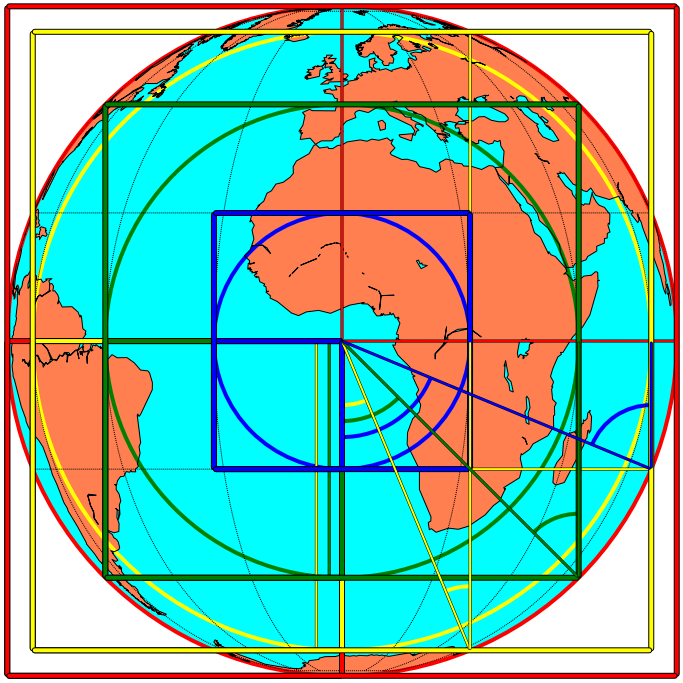

In [45]:
f, ax = plt.subplots(figsize=(12,12))
m = makeMap()

do_lines()
do_squares()
do_squares2()
do_angles()
do_circ()
do_arc()